<a href="https://colab.research.google.com/github/sahasraa178/Machine-Learning-sem-4/blob/main/ml%20lab4code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING LAB ASSIGNMENT 4**

BL.SC.U4AIE24009


B.SAHASRAA

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BERT_Embeddings.xlsx to BERT_Embeddings.xlsx


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Loading and uploading the Excel file
df = pd.read_excel("BERT_Embeddings.xlsx")

# Extracting features and labels
X = df.iloc[:, 0:768].values  # First 768 columns are BERT feature vectors
y = df['label'].values        # 'label' column is the target class label or predicted output

# Filtering for two classes (taken class 1 and 2)
mask = (y == 1) | (y == 2)
X_filtered = X[mask]
y_filtered = y[mask]

# Spliting them into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Training a kNN model with k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**A1**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# loading and preparing the dataset
def load_and_prepare_data(filepath, feature_cols=768, class_labels=(1, 2)):
    df = pd.read_excel(filepath)
    X = df.iloc[:, :feature_cols].values
    y = df['label'].values
    mask = (y == class_labels[0]) | (y == class_labels[1])
    return X[mask], y[mask]

# spliting the data function
def split_data(X, y, test_size=0.3, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# training the kNN model function
def train_knn(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

# evaluating model and returning the metrics
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)
    return cm, report

# infering the model fit type
def infer_model_fit(train_acc, test_acc, threshold=0.15, low_acc=0.6):
    if train_acc - test_acc > threshold:
        return "Overfitting"
    elif test_acc < low_acc:
        return "Underfitting"
    else:
        return "Regular Fit"

# MAIN PROGRAM

# Loading and preparing data
X, y = load_and_prepare_data("BERT_Embeddings.xlsx")

# Spliting into train and test sets
X_train, X_test, y_train, y_test = split_data(X, y)

# Training the kNN model
model = train_knn(X_train, y_train, k=3)

# Evaluating on training data
cm_train, report_train = evaluate_model(model, X_train, y_train)
train_acc = report_train['accuracy']

# Evaluating on test data
cm_test, report_test = evaluate_model(model, X_test, y_test)
test_acc = report_test['accuracy']

# Inference
fit_type = infer_model_fit(train_acc, test_acc)

# results displayed
print("--- Training Set ---")
print("Confusion Matrix:\n", cm_train)
print("Accuracy:", round(train_acc, 2))
print("Precision (Class 1):", round(report_train['1']['precision'], 2))
print("Recall (Class 1):", round(report_train['1']['recall'], 2))
print("F1-Score (Class 1):", round(report_train['1']['f1-score'], 2))
print("Precision (Class 2):", round(report_train['2']['precision'], 2))
print("Recall (Class 2):", round(report_train['2']['recall'], 2))
print("F1-Score (Class 2):", round(report_train['2']['f1-score'], 2))

print("\n--- Test Set ---")
print("Confusion Matrix:\n", cm_test)
print("Accuracy:", round(test_acc, 2))
print("Precision (Class 1):", round(report_test['1']['precision'], 2))
print("Recall (Class 1):", round(report_test['1']['recall'], 2))
print("F1-Score (Class 1):", round(report_test['1']['f1-score'], 2))
print("Precision (Class 2):", round(report_test['2']['precision'], 2))
print("Recall (Class 2):", round(report_test['2']['recall'], 2))
print("F1-Score (Class 2):", round(report_test['2']['f1-score'], 2))

print("\nModel Fit Inference:", fit_type)


--- Training Set ---
Confusion Matrix:
 [[150 164]
 [ 38 756]]
Accuracy: 0.82
Precision (Class 1): 0.8
Recall (Class 1): 0.48
F1-Score (Class 1): 0.6
Precision (Class 2): 0.82
Recall (Class 2): 0.95
F1-Score (Class 2): 0.88

--- Test Set ---
Confusion Matrix:
 [[ 36 102]
 [ 26 311]]
Accuracy: 0.73
Precision (Class 1): 0.58
Recall (Class 1): 0.26
F1-Score (Class 1): 0.36
Precision (Class 2): 0.75
Recall (Class 2): 0.92
F1-Score (Class 2): 0.83

Model Fit Inference: Regular Fit


**A2**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# calculating the regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# MAIN PROGRAM


# y_true = actual prices, y_pred = predicted prices from the model
y_true = np.array([100, 150, 200, 250, 300])
y_pred = np.array([110, 140, 195, 260, 290])

# Calculating metrics
mse, rmse, mape, r2 = calculate_regression_metrics(y_true, y_pred)

# results displayed
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 4))
print("R² Score:", round(r2, 4))


Mean Squared Error (MSE): 85.0
Root Mean Squared Error (RMSE): 9.22
Mean Absolute Percentage Error (MAPE): 0.053
R² Score: 0.983


**A3**

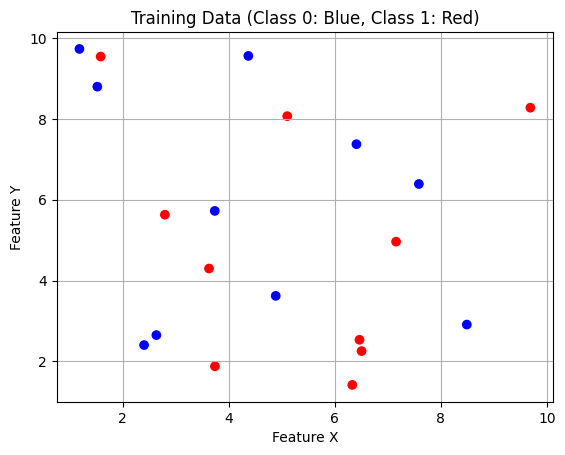

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generating 20 random 2D points with values between 1 and 10
def generate_2d_data(num_points=20, low=1, high=10, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(low, high, (num_points, 2))  # 20 points, 2 features
    y = np.array([0]*10 + [1]*10)  # First 10: class 0, next 10: class 1
    return X, y

# preparing color labels for plotting
def get_class_colors(y):
    return ['blue' if label == 0 else 'red' for label in y]

# creating the scatter plot
def plot_2d_scatter(X, y, title="2D Training Data"):
    colors = get_class_colors(y)
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=colors)
    ax.set_title(title)
    ax.set_xlabel("Feature X")
    ax.set_ylabel("Feature Y")
    ax.grid(True)
    return fig, ax

# MAIN PROGRAM

# Generating the data
X_train_2d, y_train_2d = generate_2d_data()

# Ploting the data
fig, ax = plot_2d_scatter(X_train_2d, y_train_2d, title="Training Data (Class 0: Blue, Class 1: Red)")
plt.show()


**A4**

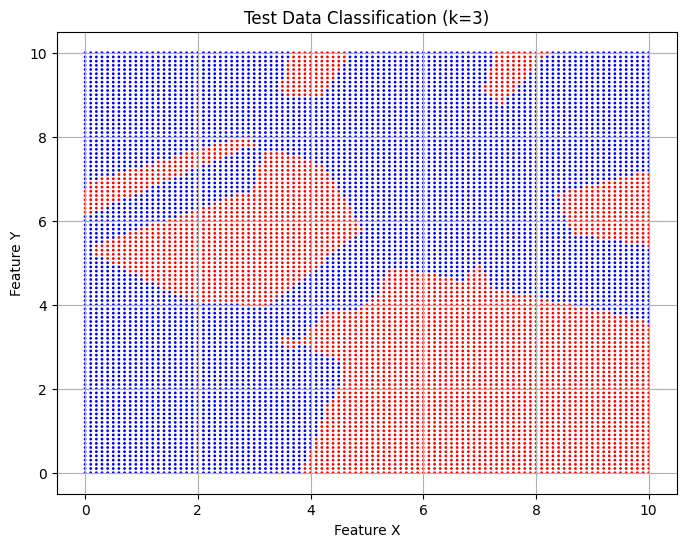

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# generating test grid points between 0 and 10 with 0.1 increments
def generate_test_grid(x_range=(0, 10), y_range=(0, 10), step=0.1):
    x_vals = np.arange(x_range[0], x_range[1] + step, step)
    y_vals = np.arange(y_range[0], y_range[1] + step, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[xx.ravel(), yy.ravel()]  # Flattening into 2D array
    return test_points, xx, yy

# training kNN classifier on 2D training data
def train_knn_classifier(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

# predicting class labels for test points
def predict_test_classes(model, test_points):
    return model.predict(test_points)

# ploting test data with predicted class colors
def plot_classified_test_data(test_points, predictions, title="kNN Classification (k=3)"):
    colors = ['blue' if label == 0 else 'red' for label in predictions]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(test_points[:, 0], test_points[:, 1], c=colors, s=1)
    ax.set_title(title)
    ax.set_xlabel("Feature X")
    ax.set_ylabel("Feature Y")
    ax.grid(True)
    return fig, ax

# MAIN PROGRAM


# X_train_2d, y_train_2d = generate_2d_data()

# Generateing test grid
test_points, xx, yy = generate_test_grid()

# Training kNN model
knn_model = train_knn_classifier(X_train_2d, y_train_2d, k=3)

# Predicting class labels for test points
test_predictions = predict_test_classes(knn_model, test_points)

# Ploting the classified test data
fig, ax = plot_classified_test_data(test_points, test_predictions, title="Test Data Classification (k=3)")
plt.show()


**A5**

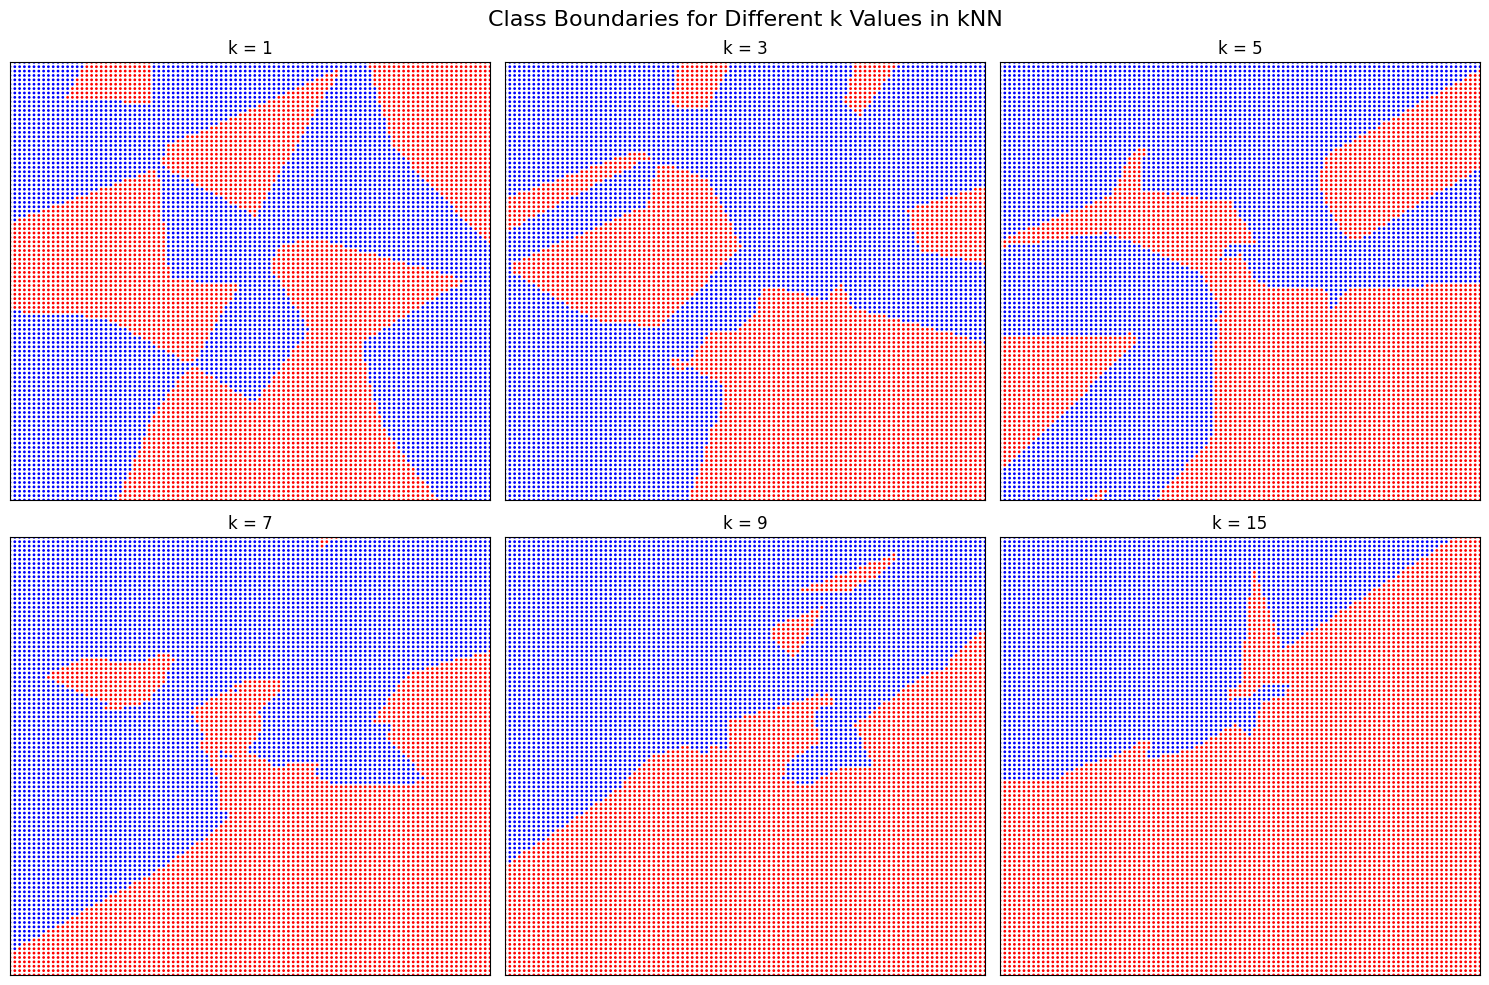

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# generating test grid points
def generate_test_grid(x_range=(0, 10), y_range=(0, 10), step=0.1):
    x_vals = np.arange(x_range[0], x_range[1] + step, step)
    y_vals = np.arange(y_range[0], y_range[1] + step, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[xx.ravel(), yy.ravel()]
    return test_points, xx, yy

# training kNN classifier
def train_knn_classifier(X_train, y_train, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

#  predicting class labels for test points
def predict_test_classes(model, test_points):
    return model.predict(test_points)

#  ploting classified test data
def plot_classified_test_data(test_points, predictions, k, ax):
    colors = ['blue' if label == 0 else 'red' for label in predictions]
    ax.scatter(test_points[:, 0], test_points[:, 1], c=colors, s=1)
    ax.set_title(f"k = {k}")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])

# MAIN PROGRAM

# X_train_2d, y_train_2d = generate_2d_data()
# Generating test grid
test_points, _, _ = generate_test_grid()

# Defining k values to test
k_values = [1, 3, 5, 7, 9, 15]

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Loops through each k and plots decision boundaries
for idx, k in enumerate(k_values):
    model = train_knn_classifier(X_train_2d, y_train_2d, k)
    predictions = predict_test_classes(model, test_points)
    plot_classified_test_data(test_points, predictions, k, axes[idx])

fig.suptitle("Class Boundaries for Different k Values in kNN", fontsize=16)
plt.tight_layout()
plt.show()


**A6**

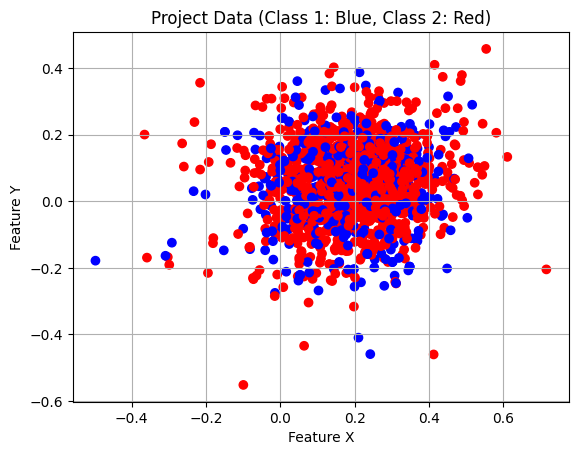

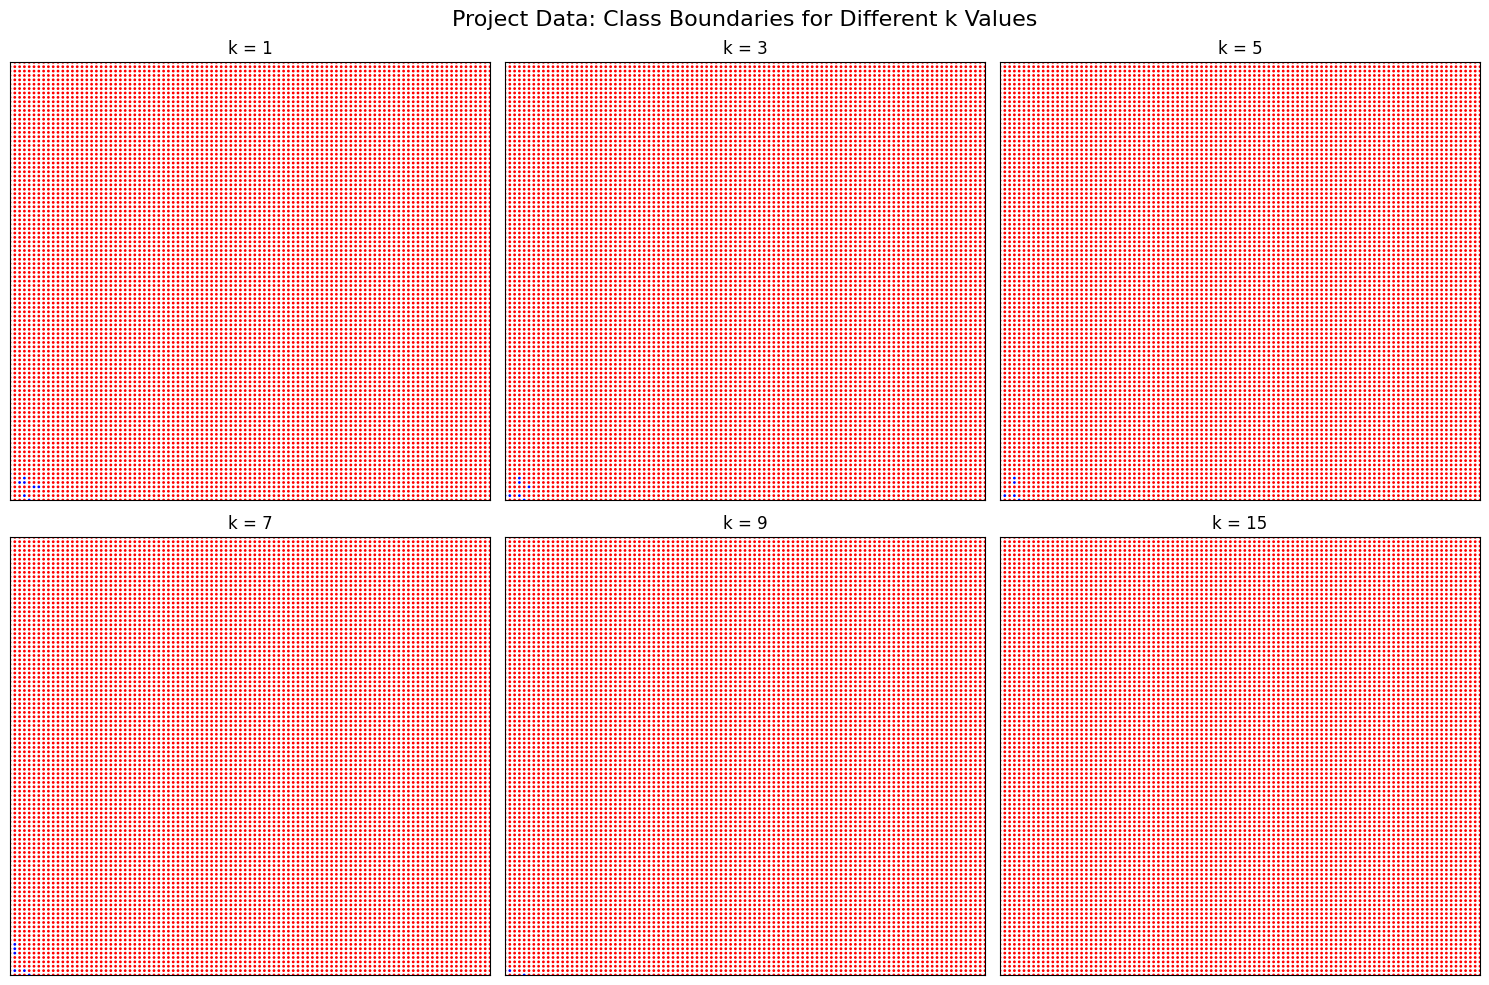

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#  loading and filtering project data for two classes and two features
def load_project_data(filepath, feature_indices=(0, 1), class_labels=(1, 2)):
    df = pd.read_excel(filepath)
    X = df.iloc[:, list(feature_indices)].values
    y = df['label'].values
    mask = (y == class_labels[0]) | (y == class_labels[1])
    return X[mask], y[mask]

#  generating test grid points
def generate_test_grid(x_range=(0, 10), y_range=(0, 10), step=0.1):
    x_vals = np.arange(x_range[0], x_range[1] + step, step)
    y_vals = np.arange(y_range[0], y_range[1] + step, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[xx.ravel(), yy.ravel()]
    return test_points, xx, yy

#  training kNN classifier
def train_knn_classifier(X_train, y_train, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

#  predicting class labels for test points
def predict_test_classes(model, test_points):
    return model.predict(test_points)

#  ploting the training data
def plot_training_data(X_train, y_train, title="Training Data"):
    colors = ['blue' if label == 1 else 'red' for label in y_train]
    fig, ax = plt.subplots()
    ax.scatter(X_train[:, 0], X_train[:, 1], c=colors)
    ax.set_title(title)
    ax.set_xlabel("Feature X")
    ax.set_ylabel("Feature Y")
    ax.grid(True)
    return fig, ax

#  ploting the classified test data
def plot_classified_test_data(test_points, predictions, k, ax):
    colors = ['blue' if label == 1 else 'red' for label in predictions]
    ax.scatter(test_points[:, 0], test_points[:, 1], c=colors, s=1)
    ax.set_title(f"k = {k}")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])

# MAIN PROGRAM

# Loading project data using two selected features and two classes
X_proj, y_proj = load_project_data("BERT_Embeddings.xlsx", feature_indices=(0, 1), class_labels=(1, 2))

# Ploting training data
fig1, ax1 = plot_training_data(X_proj, y_proj, title="Project Data (Class 1: Blue, Class 2: Red)")
plt.show()

# Generating test grid
test_points, _, _ = generate_test_grid()

# Defining k values to test
k_values = [1, 3, 5, 7, 9, 15]

# Creating subplots for test data classification
fig2, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Looping through each k and plot decision boundaries
for idx, k in enumerate(k_values):
    model = train_knn_classifier(X_proj, y_proj, k)
    predictions = predict_test_classes(model, test_points)
    plot_classified_test_data(test_points, predictions, k, axes[idx])

fig2.suptitle("Project Data: Class Boundaries for Different k Values", fontsize=16)
plt.tight_layout()
plt.show()


**A7**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# Loading and filtering project data for two selected features and two classes
def load_project_data(filepath, feature_indices=(0, 1), class_labels=(1, 2)):
    df = pd.read_excel(filepath)
    X = df.iloc[:, list(feature_indices)].values
    y = df['label'].values
    mask = (y == class_labels[0]) | (y == class_labels[1])
    return X[mask], y[mask]

# Performing Grid Search to find best k
def perform_grid_search(X_train, y_train, k_range=range(1, 21), cv=5):
    param_grid = {'n_neighbors': list(k_range)}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

# Performing Randomized Search to find best k
def perform_random_search(X_train, y_train, k_range=range(1, 51), n_iter=10, cv=5, seed=42):
    param_dist = {'n_neighbors': list(k_range)}
    random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist,
                                       n_iter=n_iter, cv=cv, random_state=seed)
    random_search.fit(X_train, y_train)
    return random_search.best_params_['n_neighbors'], random_search.best_score_

#  MAIN PROGRAM

# Loads the project data (choosing  two features and two classes)
X_proj, y_proj = load_project_data("BERT_Embeddings.xlsx", feature_indices=(0, 1), class_labels=(1, 2))

# Running Grid Search
best_k_grid, best_score_grid = perform_grid_search(X_proj, y_proj)

# Running  Search
best_k_random, best_score_random = perform_random_search(X_proj, y_proj)

# results displayed
print(" GridSearchCV Results:")
print("Best k:", best_k_grid)
print("Best cross-validated accuracy:", round(best_score_grid * 100, 2), "%")

print("\n RandomizedSearchCV Results:")
print("Best k:", best_k_random)
print("Best cross-validated accuracy:", round(best_score_random * 100, 2), "%")


 GridSearchCV Results:
Best k: 19
Best cross-validated accuracy: 70.06 %

 RandomizedSearchCV Results:
Best k: 49
Best cross-validated accuracy: 71.07 %
